Plotting F_lift and F_drag wrt Time. Each time interval must be one leg cycle from the telemetry data.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import utils

sns.set_style("whitegrid")
# sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")


In [3]:
CALIBRATION_FILE = './calibration/out/C.mat'
DATA_FILE = './experiment_data/blue_feet/4/2016.10.08_20.45.13_trial_imudata.txt'

In [4]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  20:45:13
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



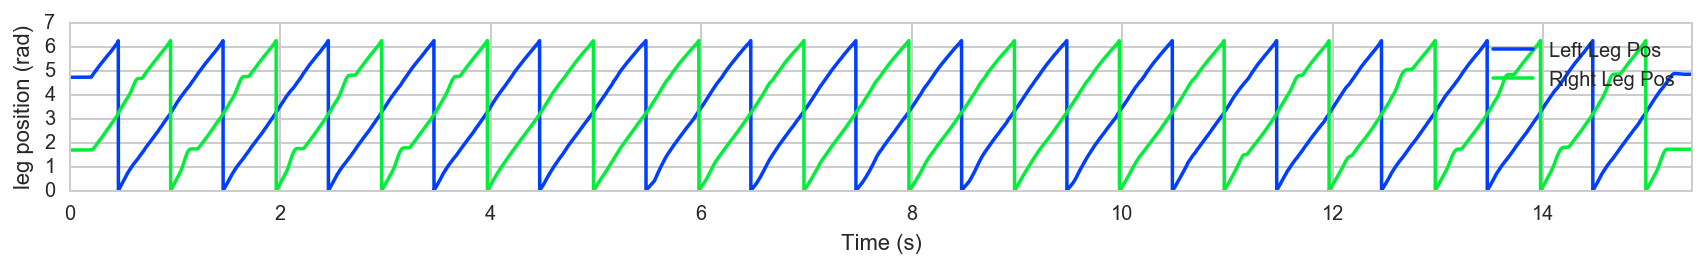

In [5]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['Left Leg Pos', 'Right Leg Pos'],], display=True, save_figure=False)

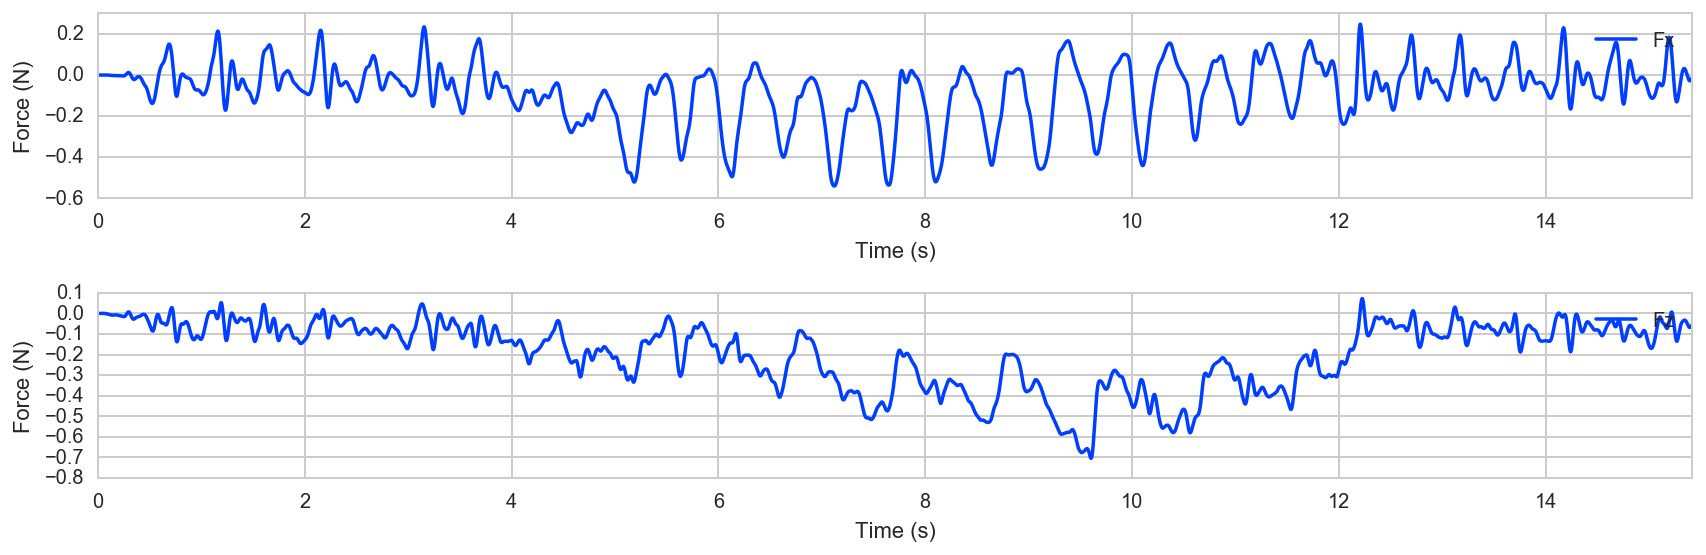

In [6]:
# Drag and Lift Forces
utils.plot_columns(df, ['Fx','Fz'], display=True, save_figure=False)

### Figure

Plot the following:
* Leg position vs Time
* F_drag vs Time
* F_lift vs Time

In [24]:
df["Fx"]

(15395,)

* For cycles in the leg are the cycles the same ?
* Leg angle 0 - 2pi
* Get it inside the steady state.
* Tricky part is that position is quantized. Parse it in between the steps.
* Plots should be Force vs Leg Position.
* Ron's code that might be useful is located inside his github repo : telemetry/blob/telem_turn/telem_turn.py

* -pi to pi time chunks might be more useful.
* 
